# 03.- Exploratory Data Analysis

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

# Set Seaborn theme
sns.set_theme(style="whitegrid", palette="pastel", font="sans-serif")
sns.set_context("notebook", font_scale=0.8)

# Display options for Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

<Figure size 600x400 with 0 Axes>

In [2]:
# Load your dataset
df = pd.read_csv("../data/processed/features.csv").drop(['Date'], axis=1)

In [ ]:
# Basic data overview
print("Shape of the dataset:", df.shape)

print("Summary of numerical features:")
print(df.describe())

print("Data types and null counts:")
print(df.info())

print("Check for missing values:")
print(df.isnull().sum())
print("First five rows of the dataset:")
df.head()

Shape of the dataset: (103, 7)
Summary of numerical features:
       Abs Extrema Duration  Low Threshold Count  Pattern Extrema Duration  \
count               103.000              103.000                   103.000   
mean                  0.556                0.050                     0.158   
std                   0.238                0.028                     0.122   
min                   0.067                0.000                     0.033   
25%                   0.400                0.033                     0.067   
50%                   0.533                0.067                     0.133   
75%                   0.750                0.067                     0.200   
max                   0.967                0.100                     0.600   

       Min Deviation  Min Mean   Label  
count        103.000   103.000 103.000  
mean           0.283     0.164   0.495  
std            0.116     0.133   0.502  
min            0.012     0.009   0.000  
25%            0.203     0.054

,Abs Extrema Duration,Low Threshold Count,Max Between Min,Pattern Extrema Duration,Min Deviation,Min Mean,Label
0,0.700,0.033,False,0.100,0.384,0.262,0.000
1,0.367,0.033,False,0.200,0.483,0.382,0.000
2,0.700,0.067,True,0.067,0.012,0.009,1.000
3,0.467,0.067,True,0.133,0.386,0.088,0.000
4,0.567,0.000,False,0.067,0.084,0.480,0.000


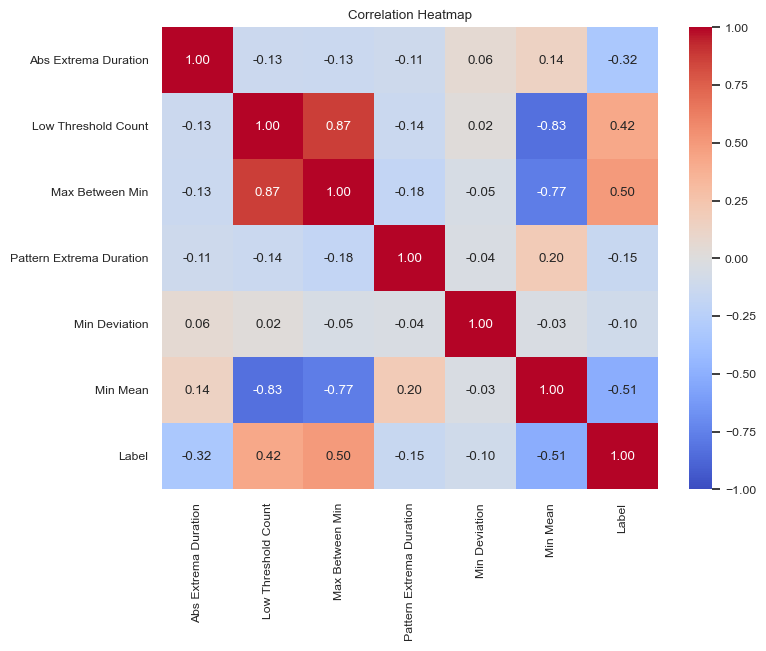

In [4]:
# Correlation heatmap for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

**Analysis**

- Correlation between *Low Threshold Count* and *Max Between Min*:
  
  The strong correlation of 0.87 indicates that contain similar information, which may cause multicollinearity. This may cause the linear models to fail to correctly separate the individual contribution of *Low Threshold Count* and *Max Between Min*.

- Relationship of *Low Threshold Count* and *Max Between Min* with the dependent variable: 
  
  *Low Threshold Count* has a correlation of 0.42 and *Max Between Min* has 0.5, which means that both have a moderate relationship with the dependent variable. Despite the high correlation between *Low Threshold Count* and *Max Between Min*, both are relevant for predicting the dependent variable.

- Relationship of *Min Mean* with the dependent variable:
  
  Characteristic *Min Mean* has a correlation of -0.51 with the dependent variable, indicating that it has a strong, but inverse relationship. In addition, *Min Mean* is negatively correlated with *Low Threshold Count* and *Max Between Min* (correlation of -0.83 and -0.77), suggesting that *Min Mean* offers a different perspective on the data.

**Conclusions**

- Multicollinearity:
  
  The strong correlation between *Low Threshold Count* and *Max Between Min* may generate multicollinearity problems, especially in linear models. This could make it difficult to interpret the coefficients of these characteristics.

- Complementarity of *Min Mean*:
  
  Although *Min Mean* is inversely correlated with *Low Threshold Count* and *Max Between Min*, its negative relationship with the dependent variable suggests that *Min Mean* could contribute additional and valuable information to the model. *Min Mean* is not redundant with *Low Threshold Count* and *Max Between Min*, but offers a different perspective.

**Recommendations**

- Linear Models:
  Since *Low Threshold Count* and *Max Between Min* are strongly correlated, it is advisable to apply regularization techniques such as Ridge or Lasso to mitigate the effects of multicollinearity and improve model stability.
  
  If multicollinearity is still a problem, dimensionality reduction using Principal Component Analysis (PCA) could be considered to combine *Low Threshold Count* and *Max Between Min* into a single feature, keeping the most relevant information.


- Nonlinear Models:
  In nonlinear models such as decision trees, random forests or XGBoost, multicollinearity is not such a significant problem, since these models do not depend directly on the feature coefficients.
  
  Keeping *Low Threshold Count*, *Max Between Min* and *Min Mean* in the data will be beneficial for capturing complex and nonlinear patterns in the data. The inverse relationship between *Min Mean* and the rest of the features can help improve the predictive ability of the model, as *Min Mean* brings a different perspective.

**In summary, it is advisable to keep all three features *Low Threshold Count*, *Max Between Min* and *Min Mean* in the data set, especially if using nonlinear models. However, if linear models are planned to be used, applying regularization or dimensionality reduction techniques would be beneficial to avoid the negative effects of multicollinearity.**